# EDA of Titanic Survived People

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load data and check missing values
data=pd.read_csv("Titanic.csv")
print(data.isna().sum())

#Fill missing Values
data['Age']=data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

#drop column having too many missing values
data.drop(columns='Cabin',inplace=True)
data.to_csv('titanic_cleaned.csv',index=False)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [46]:
#Converting data types
data=data.convert_dtypes()

data['Sex']=data['Sex'].astype('category')
data['Embarked']=data['Embarked'].astype('category')

data['Sex']=data['Sex'].map({'male':0,'female':1})
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2})

print(data.dtypes)


PassengerId             Int64
Survived                Int64
Pclass                  Int64
Name           string[python]
Sex                  category
Age                   Float64
SibSp                   Int64
Parch                   Int64
Ticket         string[python]
Fare                  Float64
Embarked             category
dtype: object


In [47]:
#Group Based Insigts
print(data.describe())

       PassengerId  Survived    Pclass        Age     SibSp     Parch  \
count        891.0     891.0     891.0      891.0     891.0     891.0   
mean         446.0  0.383838  2.308642  29.361582  0.523008  0.381594   
std     257.353842  0.486592  0.836071  13.019697  1.102743  0.806057   
min            1.0       0.0       1.0       0.42       0.0       0.0   
25%          223.5       0.0       2.0       22.0       0.0       0.0   
50%          446.0       0.0       3.0       28.0       0.0       0.0   
75%          668.5       1.0       3.0       35.0       1.0       0.0   
max          891.0       1.0       3.0       80.0       8.0       6.0   

            Fare  
count      891.0  
mean   32.204208  
std    49.693429  
min          0.0  
25%       7.9104  
50%      14.4542  
75%         31.0  
max     512.3292  


In [48]:
print(data.groupby('Sex',observed=True)['Survived'].mean())
print(data.groupby('Pclass',observed=True)['Survived'].mean())
print(data.groupby(['Sex','Age'])['Survived'].mean())

Sex
1    0.742038
0    0.188908
Name: Survived, dtype: Float64
Pclass
1     0.62963
2    0.472826
3    0.242363
Name: Survived, dtype: Float64
Sex  Age 
1    0.42    <NA>
     0.67    <NA>
     0.75     1.0
     0.83    <NA>
     0.92    <NA>
             ... 
0    70.0     0.0
     70.5     0.0
     71.0     0.0
     74.0     0.0
     80.0     1.0
Name: Survived, Length: 176, dtype: Float64


C:\Users\Danish Laptop\AppData\Local\Temp\ipykernel_9988\356626779.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(['Sex','Age'])['Survived'].mean())


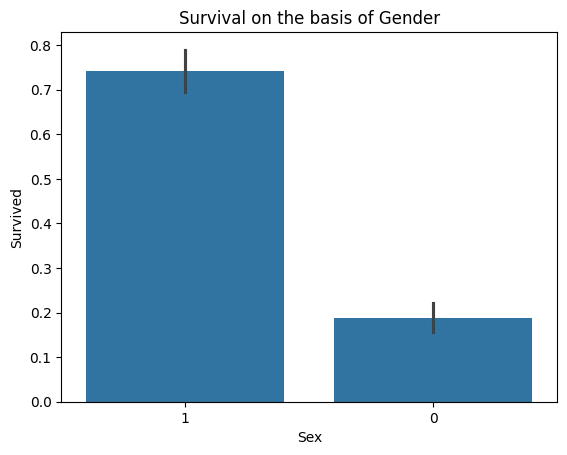

In [49]:
#Visualization
sns.barplot(x='Sex',y='Survived',data=data)
plt.title("Survival on the basis of Gender")
plt.show()

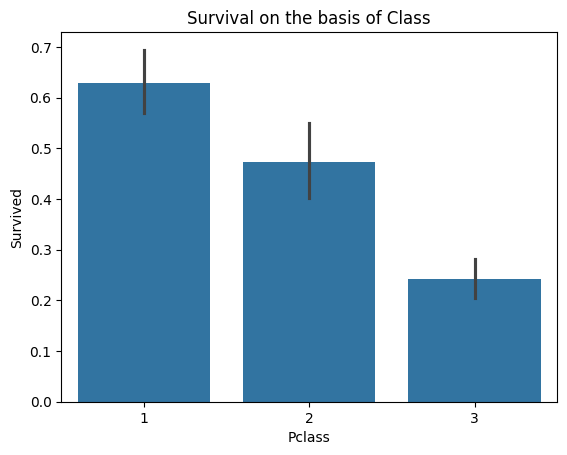

In [50]:
sns.barplot(x='Pclass',y='Survived',data=data)
plt.title("Survival on the basis of Class")
plt.show()

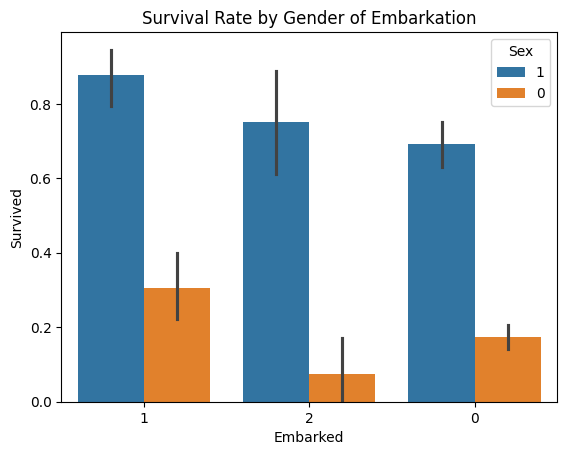

In [51]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=data)
plt.title("Survival Rate by Gender of Embarkation")
plt.show()

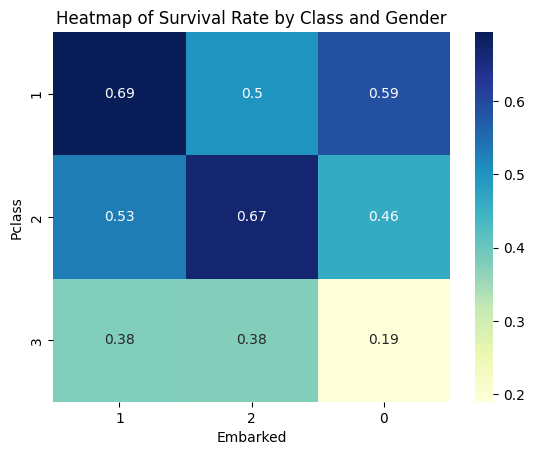

In [52]:
# Heatmap of pivot table
pivot = pd.pivot_table(data, values='Survived', index='Pclass', columns='Embarked', observed=True)
sns.heatmap(pivot.astype(float), annot=True, cmap='YlGnBu')
plt.title("Heatmap of Survival Rate by Class and Gender")
plt.show()